In [36]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

file_path = "/content/drive/MyDrive/softcom_project_data/SarcasDetection.csv"

# Load the dataset
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,Comments,Label
0,0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1.0
1,1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1.0
2,2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1.0
3,3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1.0
4,4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1.0


In [4]:
# Helper functions

from sklearn import metrics
# helper function to print accuracy, precision, recall, F1
def print_4_metrics(target_test, predicted):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)

    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [5]:
column_to_drop = 'Unnamed: 0'
data = df.drop(column_to_drop, axis=1)
pd.DataFrame(data)

,Comments,Label
0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1.0
1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1.0
2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1.0
3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1.0
4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1.0
...,...,...
5107,আলগা পিরিতি। কিন্তু নিজের জেলার মানুষ কষ্ট করত...,0.0
5108,ফেইসবুক ছাড়া আপনাদের আর কোথাও দেখা মেলেনা।,0.0
5109,শুধু ঢাকাই বসে বসে বকবক করা ছাড়া কিছু করবে না ...,0.0
5110,সংবাদ পড়া বাদ দিয়ে মানুষের পাশে দাঁড়ান।,0.0


In [6]:
# splitting the dataset
data_unlabeled = df['Comments']
# data_unlabeled.head()
data_labels = df['Label']
# data_labels.head()
len(data_unlabeled)

data_unlabeled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5112 entries, 0 to 5111
Series name: Comments
Non-Null Count  Dtype 
--------------  ----- 
5112 non-null   object
dtypes: object(1)
memory usage: 40.1+ KB


In [7]:
# getting the top 10 most used words
import collections
import plotly.express as px

# Assuming df is your DataFrame with Bengali text
words = []
for text in df['Comments']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Create a Plotly bar chart
fig = px.bar(x=list(top_words.keys()), y=list(top_words.values()), labels={'x': 'Words', 'y': 'Frequency'})
fig.update_layout(title_text='Top 10 most used words', title_font_size=18)
fig.show()


<Axes: >

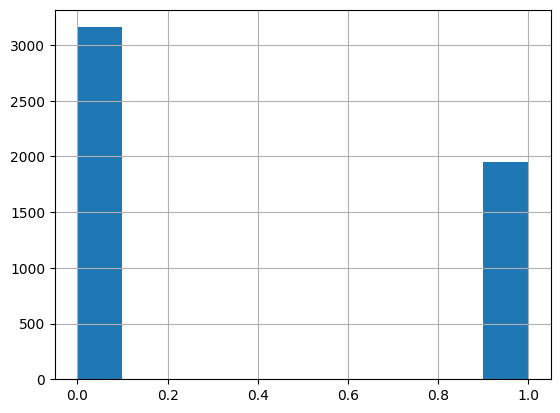

In [8]:
# a histogram of the values in the data_labels(0,1)
data_labels.hist()

In [9]:
df.duplicated().sum()

0

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re

# Clean data: get rid of weird characters
data_clean = data_unlabeled.replace('[^ \u0980-\u09FF]+', '', regex=True)

# Remove underscores
data_clean = data_clean.replace('_', '', regex=True)

# Remove numbers
data_clean = data_clean.replace('\d+', '', regex=True)
print(data_clean)


0       আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...
1       আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...
2       বাহ  আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষী স...
3                            হাহ মজার বিষয়আনোয়েড গ্রুআপ
4                 থান্ডার আমাকে  এ জেগে উঠলে এটি ভালবাসুন
                              ...                        
5107    আলগা পিরিতি কিন্তু নিজের জেলার মানুষ কষ্ট করতে...
5108            ফেইসবুক ছাড়া আপনাদের আর কোথাও দেখা মেলেনা
5109    শুধু ঢাকাই বসে বসে বকবক করা ছাড়া কিছু করবে না ...
5110               সংবাদ পড়া বাদ দিয়ে মানুষের পাশে দাঁড়ান
5111    কে কার বাবা ও কার সন্তান হবে সেটা জন্মের আগে ক...
Name: Comments, Length: 5112, dtype: object


In [12]:
#removing stopwords from data_clean to normalize the data
from nltk.corpus import stopwords

stopwords_bengali = set(stopwords.words('bengali'))
data_clean = data_clean.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_bengali)])) # remove stop words
#data_clean = data_clean.apply(lambda x: " ".join(x.lower() for x in x.split())) # to lower case
data_clean

0          মেয়েরা উদ্দেশ্য অনুসারে বোবা বোবা আচরণ সুন্দর
1       গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা সত্যিই পছন্দ করিআ...
2           বাহ পাচ্ছি সত্যিই দোষী দোষী সাব্যস্তনোটপ্রেসড
3                            হাহ মজার বিষয়আনোয়েড গ্রুআপ
4                              থান্ডার জেগে উঠলে ভালবাসুন
                              ...                        
5107              আলগা পিরিতি জেলার মানুষ কষ্ট করতেছে খবর
5108                    ফেইসবুক ছাড়া আপনাদের কোথাও মেলেনা
5109                        ঢাকাই বকবক ছাড়া বকবক পাটির দল
5110               সংবাদ পড়া বাদ দিয়ে মানুষের পাশে দাঁড়ান
5111    কার বাবা কার সন্তান জন্মের রেস প্রতিযোগিতায় স...
Name: Comments, Length: 5112, dtype: object

In [13]:
# vectorizing the data
from sklearn.feature_extraction.text import TfidfVectorizer

n=1
ngram_range=(n, n)
vectorizer = TfidfVectorizer(ngram_range=ngram_range)
X = vectorizer.fit_transform(data_clean)
tfidf_matrix = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
X.shape

(5112, 2081)

In [14]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
print(X)

  (0, 1091)	0.3900511959667978
  (0, 120)	0.6622474083348375
  (0, 22)	0.38260353179433365
  (0, 346)	0.5127406480250654
  (1, 202)	0.3275601884092433
  (1, 177)	0.2631255998759425
  (1, 642)	0.2052798837426302
  (1, 1265)	0.6677014739583725
  (1, 1884)	0.2851662476521115
  (1, 1707)	0.3301788940343831
  (1, 1398)	0.3810069051840163
  (2, 1883)	0.5699557020005355
  (2, 924)	0.473046292399853
  (2, 1022)	0.3893204168555219
  (2, 1613)	0.44470210710814007
  (2, 1884)	0.3194485122157446
  (3, 156)	0.41539153159213776
  (3, 148)	0.5177650298981268
  (3, 1851)	0.5797901413489553
  (3, 1498)	0.4724538509639733
  (4, 1760)	0.5608909615904698
  (4, 343)	0.8278896842008108
  (5, 1391)	0.2321110242676335
  (5, 1593)	0.8693484129260785
  (5, 1600)	0.30851078535145154
  :	:
  (5104, 1568)	0.5771253723505148
  (5104, 1873)	0.5771253723505148
  (5104, 883)	0.4337817689665744
  (5104, 1342)	0.3816883363305579
  (5105, 2032)	1.0
  (5106, 1726)	0.5625270131196173
  (5106, 437)	0.5836529816170816
  (510

In [15]:
# split the full dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data_labels, train_size = 0.8, test_size=0.2, random_state=4)

Accuracy:    0.818182
Precision:   0.814465
Recall:      0.670984
F1 Score:    0.735795


Confusion Matrix: 



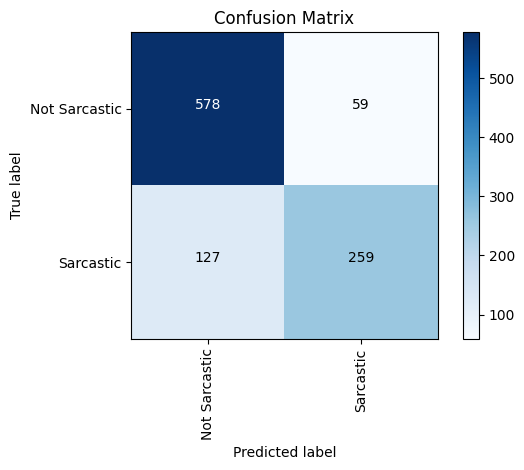

In [17]:
# fitting the dataset to a logistic regression model
import numpy as np
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', max_iter=1000)

log_reg.fit(X_train, y_train)
log_predicted = log_reg.predict(X_test)
log_score = log_reg.predict_proba(X_test)[:,1]

print_4_metrics(y_test, log_predicted)

print("\n\nConfusion Matrix: \n")
draw_confusion_matrix(y_test, log_predicted, ['Not Sarcastic', 'Sarcastic'])

<ipython-input-18-cc7a67ad7153>:9: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

For lambda= 0.0 , accuracy across folds is: 82.12%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

For lambda= 0.05263157894736842 , accuracy across folds is: 83.42%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

For lambda= 0.10526315789473684 , accuracy across folds is: 83.22%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

For lambda= 0.15789473684210525 , accuracy across folds is: 83.17%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



For lambda= 0.21052631578947367 , accuracy across folds is: 83.08%
For lambda= 0.2631578947368421 , accuracy across folds is: 83.15%
For lambda= 0.3157894736842105 , accuracy across folds is: 82.78%
For lambda= 0.3684210526315789 , accuracy across folds is: 82.76%
For lambda= 0.42105263157894735 , accuracy across folds is: 82.76%
For lambda= 0.47368421052631576 , accuracy across folds is: 82.68%
For lambda= 0.5263157894736842 , accuracy across folds is: 82.59%
For lambda= 0.5789473684210527 , accuracy across folds is: 82.51%
For lambda= 0.631578947368421 , accuracy across folds is: 82.49%
For lambda= 0.6842105263157894 , accuracy across folds is: 82.59%
For lambda= 0.7368421052631579 , accuracy across folds is: 82.54%
For lambda= 0.7894736842105263 , accuracy across folds is: 82.34%
For lambda= 0.8421052631578947 , accuracy across folds is: 82.37%
For lambda= 0.894736842105263 , accuracy across folds is: 82.20%
For lambda= 0.9473684210526315 , accuracy across folds is: 81.98%
For lambd

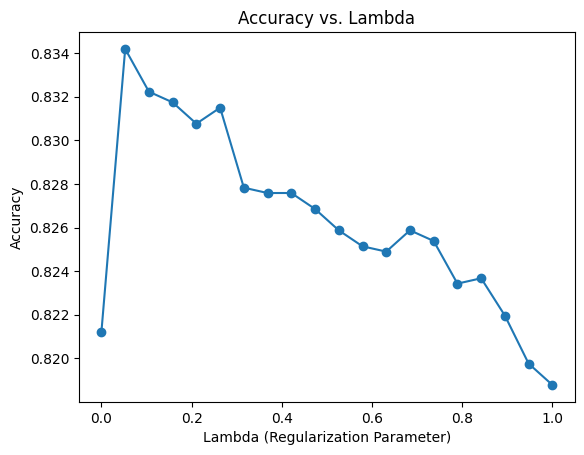

In [18]:
# testing lambda values to optimize logistic regression model
from sklearn import model_selection

lambda_list = np.linspace(start = 0, stop = 1, num = 20)
accuracy_list = []
for lambd in lambda_list:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    # Train the model
    log_model_kfold_train = LogisticRegression(C = 1/lambd)
    log_results_kfold_train = model_selection.cross_val_score(log_model_kfold_train, X_train, y_train, cv=kfold)
    # Calculate accuracy
    accuracy = log_results_kfold_train.mean()
    # Append lambda and accuracy to the lists
    accuracy_list.append(accuracy)
    print("For lambda=",lambd, ", accuracy across folds is: %.2f%%" % (log_results_kfold_train.mean()*100.0))

# Plot the scatter plot
plt.figure()
plt.scatter(lambda_list, accuracy_list)
plt.plot(lambda_list, accuracy_list)
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Lambda')
plt.show()

Optimal Lambda: 0.05263157894736842
Maximum Accuracy: 0.8341914761014431


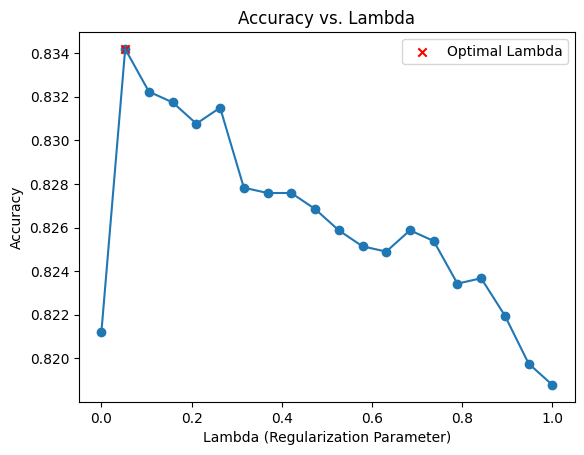

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# Find the lambda with maximum accuracy
optimal_lambda = lambda_list[np.argmax(accuracy_list)]
max_accuracy = max(accuracy_list)

print("Optimal Lambda:", optimal_lambda)
print("Maximum Accuracy:", max_accuracy)

# Plot the scatter plot with the optimal lambda marked
plt.figure()
plt.scatter(lambda_list, accuracy_list)
plt.plot(lambda_list, accuracy_list)
plt.scatter(optimal_lambda, max_accuracy, color='red', marker='x', label='Optimal Lambda')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Lambda')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy:    0.834800
Precision:   0.798898
Recall:      0.751295
F1 Score:    0.774366


Confusion Matrix: 



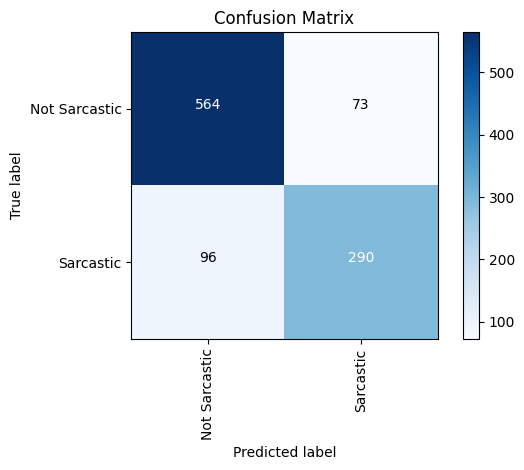

In [20]:
# implementing the optimized logistic regression model
lambd = 0.05263157894736842 # this is the optimal lambda

log_reg = LogisticRegression(penalty='l2', C=1/lambd)
log_reg.fit(X_train, y_train)
log_predicted = log_reg.predict(X_test)
log_score = log_reg.predict_proba(X_test)[:,1]

print_4_metrics(y_test, log_predicted)

print("\n\nConfusion Matrix: \n")
draw_confusion_matrix(y_test, log_predicted, ['Not Sarcastic', 'Sarcastic'])

In [21]:
# printing predicted vs actual labels
print("label\tP(Y=1)\tCorrect?")
for i in range(0,10):
    print(y_test.iloc[i], " ", log_score[i], " ", str((y_test.iloc[i] == 1 and log_score[i] >= 0.5) or (y_test.iloc[i] == 0 and log_score[i] < 0.5)))

label	P(Y=1)	Correct?
0.0   0.04308425700055864   True
1.0   0.41556536734552535   False
1.0   0.9183687415954352   True
1.0   0.843788892504841   True
0.0   0.6796350256909893   False
1.0   0.9961982654584632   True
0.0   0.012911483926896809   True
1.0   0.9570347321979491   True
0.0   0.12817747543752844   True
0.0   0.7629133106405716   False


In [22]:
# printing accuracy rates
accuracy_list

[0.8212306438467808,
 0.8341914761014431,
 0.8322306917877176,
 0.8317398964475766,
 0.8307619013375522,
 0.8314971954551993,
 0.8278273167457693,
 0.8275822187065536,
 0.8275834172299728,
 0.8268499208974542,
 0.8258713265257203,
 0.8251384294549116,
 0.824894529939115,
 0.825873124310849,
 0.8253823289707082,
 0.8234269380123689,
 0.823672635313294,
 0.821959945347332,
 0.8197588570880676,
 0.818780861978043]

Accuracy:    0.848485
Precision:   0.829060
Recall:      0.753886
F1 Score:    0.789688
SVM Model Performance Results:

AUC of ROC:  0.904222350558398


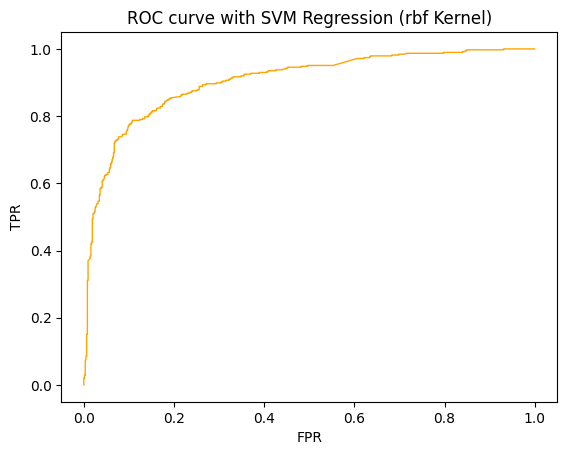

In [23]:
# SVM Model with no Regularization (C -> inf, lambda -> 0)
import numpy as np
from sklearn.svm import SVC
from matplotlib import pyplot

svm = SVC(probability = True, C=1e10)

svm.fit(X_train, y_train)

svm_predicted = svm.predict(X_test)
svm_score = svm.predict_proba(X_test)[:,1]

print_4_metrics(y_test, svm_predicted)

# Plot ROC curve and report area under ROC
# use metrics.roc_curve(your y_test, predicted probabilities for y_test)
# feel free to use the same code as 3.1.1.
'''your code goes below here'''
fpr_svm_reg, tpr_svm_reg, thresholds = metrics.roc_curve(y_test,svm_score)
print("SVM Model Performance Results:\n")
pyplot.figure(1)
pyplot.plot(fpr_svm_reg, tpr_svm_reg, color='orange', lw=1)
pyplot.title("ROC curve with SVM Regression (rbf Kernel)")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
# report auc
# use metrics.auc(fpr, tpr)
aucroc = metrics.auc(fpr_svm_reg, tpr_svm_reg)
print('AUC of ROC: ', aucroc)

Confusion Matrix: 



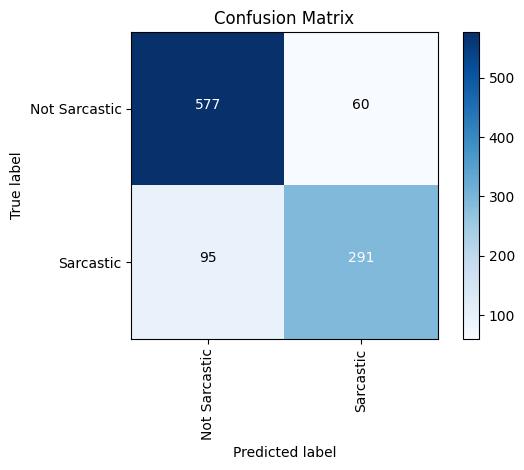

In [24]:
print("Confusion Matrix: \n")
draw_confusion_matrix(y_test, svm_predicted, ['Not Sarcastic', 'Sarcastic'])

In [25]:
# tokenizing and padding the data for RNN
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_features = 2000

tokenizer = Tokenizer(max_features, split = ' ')
tokenizer.fit_on_texts(data_clean)
X_tokenized = tokenizer.texts_to_sequences(data_clean)
X_padded = pad_sequences(X_tokenized)

X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded, data_labels, test_size=0.2, random_state=4)

In [26]:
X_padded.shape

(5112, 70)

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import layers, regularizers

model = Sequential()

# hyperparams

embed_vec_size = 120 # hyperparam that controls size of embedding vector
num_layers = 200 # also hyperparam
batch_size = 32
learning_rate=0.0001
dropout_rate = 0.5
reg_strength = 0.005
patience = 10

# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']
# batch_size = [16,32,64,128,256]

model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
model.add(layers.LSTM(num_layers, dropout=dropout_rate, return_sequences=True))
model.add(BatchNormalization())
model.add(layers.LSTM(num_layers, dropout=dropout_rate))  # Additional LSTM layer
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
# model.add(Dropout(dropout_rate))
model.add(Dense(units=1, activation='sigmoid'))

early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train_rnn, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping]) # , callbacks=[early_stopping]
score = model.evaluate(X_test_rnn, y_test) # 2-element vector containing loss, and accuracy

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/100
128/128 [==============================] - 24s 126ms/step - loss: 1.2206 - accuracy: 0.5439 - val_loss: 1.0459 - val_accuracy: 0.6227
Epoch 2/100
128/128 [==============================] - 3s 26ms/step - loss: 1.0933 - accuracy: 0.6136 - val_loss: 1.0338 - val_accuracy: 0.6227
Epoch 3/100
128/128 [==============================] - 3s 22ms/step - loss: 0.9919 - accuracy: 0.6716 - val_loss: 1.0055 - val_accuracy: 0.6315
Epoch 4/100
128/128 [==============================] - 3s 25ms/step - loss: 0.8963 - accuracy: 0.7342 - val_loss: 0.8767 - val_accuracy: 0.7175
Epoch 5/100
128/128 [==============================] - 3s 22ms/step - loss: 0.8033 - accuracy: 0.7775 - val_loss: 0.7182 - val_accuracy: 0.8319
Epoch 6/100
128/128 [==============================] - 2s 17ms/step - loss: 0.7278 - accuracy: 0.8168 - val_loss: 0.6238 - val_accuracy: 0.8739
Epoch 7/100
128/128 [==============================] - 2s 12ms/step - loss: 0.6740 - accuracy: 0.8396 - val_loss: 0.5724 - val_accurac

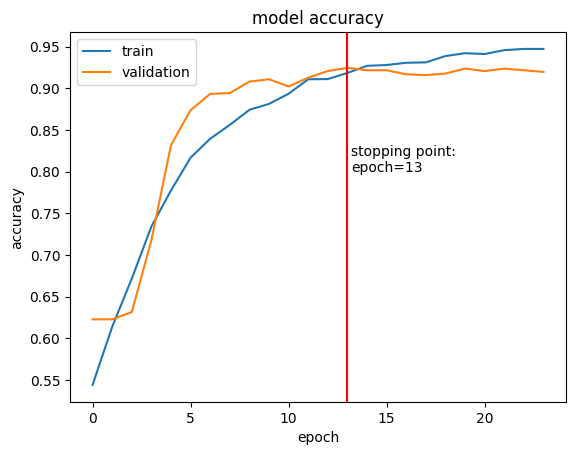

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
stop_epoch = early_stopping.stopped_epoch-patience
plt.axvline(stop_epoch, color='r')
label = 'stopping point: \nepoch=' + str(stop_epoch)
plt.text(stop_epoch+0.2, .8, label, rotation=0)
plt.show()

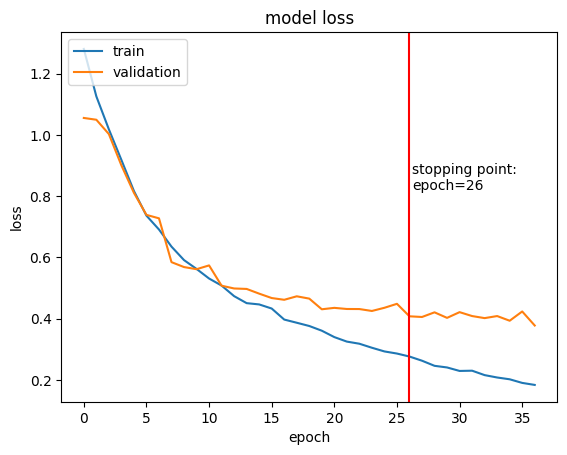

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axvline(stop_epoch, color='r')
plt.text(stop_epoch+0.2,.82, label,rotation=0)
plt.show()

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import scipy.sparse as sp

# Assuming x_train, y_train, x_test, y_test are your training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, data_labels, train_size=0.8, test_size=0.2, random_state=4)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert sparse matrix to dense array for training, validation, and testing data
x_train_dense = X_train.toarray()
x_val_dense = X_val.toarray()
x_test_dense = X_test.toarray()

x_train_tensor = torch.tensor(x_train_dense, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_val_dense, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)  # Use .values to get the underlying NumPy array

# Define y_test_tensor
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training, validation, and testing
batch_size = 32
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [30]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
maxlen = 20
batch_size = 32

In [31]:
# Assuming x_train is a CSR matrix and original_texts is a list of corresponding text samples
original_texts = [" ".join(map(str, row)) for row in X_train.toarray()]

# Now use the Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(original_texts)

# Create word_index dictionary
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(original_texts)

print("Unique words: {}".format(len(word_index)))

Unique words: 12577


In [35]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, BatchNormalization, Dropout, LSTM, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming you have filtered_train and data_labels for your training data
max_features = 2000

# Tokenizing and padding the data for RNN
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data_clean)
X_tokenized = tokenizer.texts_to_sequences(data_clean)
X_padded = pad_sequences(X_tokenized)

# Encode labels into categorical format
y_categorical = to_categorical(data_labels, num_classes=4)

# Split the data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=4)

# hyperparameters
embed_vec_size = 120
num_layers = 200
batch_size = 32
learning_rate = 0.0001
dropout_rate = 0.5
reg_strength = 0.005
patience = 10

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
model.add(Bidirectional(LSTM(num_layers, dropout=dropout_rate, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(num_layers, dropout=dropout_rate)))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
model.add(Dense(units=4, activation='softmax'))  # Use 'softmax' for multi-class classification

# Compile the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(X_train_rnn, y_train_rnn, epochs=100, batch_size=batch_size,
                 validation_data=(X_test_rnn, y_test_rnn), callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test_rnn, y_test_rnn)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])



Epoch 1/100
128/128 [==============================] - 23s 91ms/step - loss: 2.0677 - accuracy: 0.3705 - val_loss: 1.6456 - val_accuracy: 0.6227
Epoch 2/100
128/128 [==============================] - 4s 34ms/step - loss: 1.4803 - accuracy: 0.5652 - val_loss: 1.5767 - val_accuracy: 0.6227
Epoch 3/100
128/128 [==============================] - 4s 28ms/step - loss: 1.2794 - accuracy: 0.6454 - val_loss: 1.4095 - val_accuracy: 0.6061
Epoch 4/100
128/128 [==============================] - 4s 32ms/step - loss: 1.0642 - accuracy: 0.7361 - val_loss: 0.9771 - val_accuracy: 0.8250
Epoch 5/100
128/128 [==============================] - 3s 26ms/step - loss: 0.9128 - accuracy: 0.8048 - val_loss: 0.7669 - val_accuracy: 0.8671
Epoch 6/100
128/128 [==============================] - 3s 25ms/step - loss: 0.7963 - accuracy: 0.8418 - val_loss: 0.6985 - val_accuracy: 0.8837
Epoch 7/100
128/128 [==============================] - 4s 31ms/step - loss: 0.7332 - accuracy: 0.8667 - val_loss: 0.6338 - val_accuracy